In [1]:
import librosa
import os
import IPython
import numpy as np

from wavelet_filter import Wavelet_Filter
from utils import plot_original_vs_filtered, calc_snr, plot_spectrogram

In [2]:
start = 600000
end = 2500000

data_path = f'{os.getcwd()}/data/1800_convo.wav'
signal, sr = librosa.load(data_path)
signal += np.random.uniform(0, 0.2 ,len(signal)) * np.random.normal(0, 0.2, len(signal))
#IPython.display.Audio(signal[start:end], rate = sr)

In [3]:
wavelet_filter = Wavelet_Filter(threshold="soft", wavelet="db2", 
                                level = 1, mode = "per", x=signal)
reconstr = wavelet_filter._filter(scaling_factor=0.5, universal=True, operation="median")

In [4]:
#IPython.display.Audio(reconstr[start:end], rate = sr)

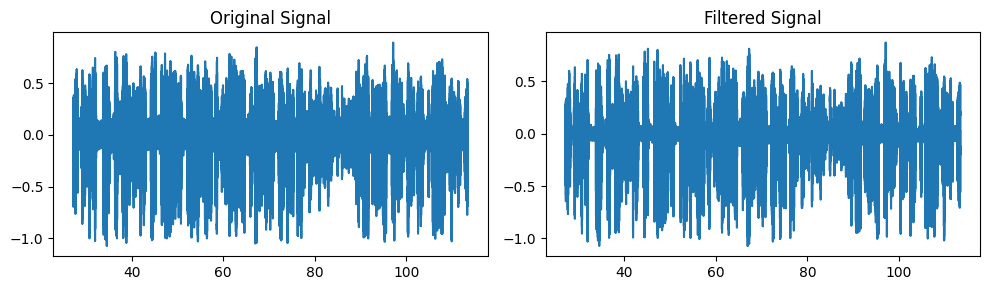

In [5]:
plot_original_vs_filtered(x = signal, x_hat = reconstr, start = start, end = end, sr=sr)

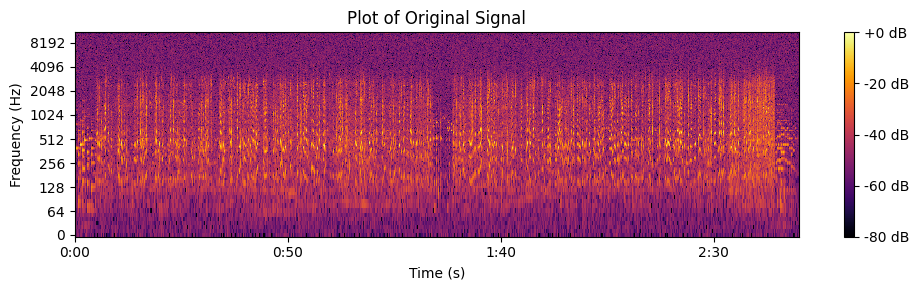

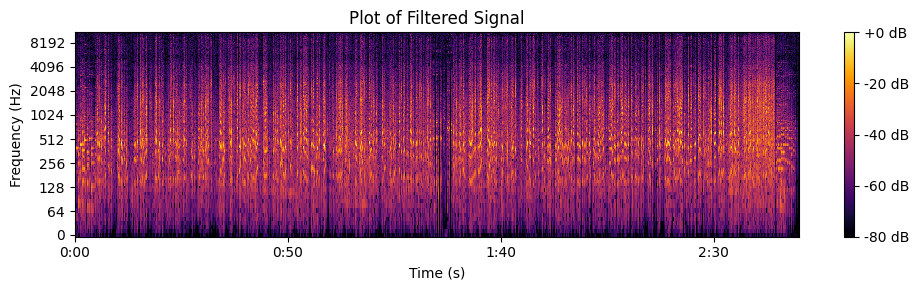

In [6]:
plot_spectrogram(audio_signal=signal, sr = sr, title = 'Plot of Original Signal',
                 out_path=f'{os.getcwd()}/plots')
plot_spectrogram(audio_signal=reconstr, sr = sr, title = 'Plot of Filtered Signal',
                 out_path=f'{os.getcwd()}/plots')

In [7]:
display(calc_snr(x = signal, x_hat=reconstr))

np.float64(10.915423430029513)